In [1]:
#we will build a machine learning model using k-nearest neighbors algorithm to predict if patients in the dataset have diabetes or not
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
diabetes_df = pd.read_csv('/Users/alpha/Downloads/Data Science 1/Labs/week_7/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#use describe() and info() to get better sense of data and see if have any missing values
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.describe()
#Some values are 0 for things like insulin and BMI, and since that value makes no sense for those columns it shows that maybe some values were excluded from the dataset for some reason
#Therefore we will consider the following columns to have missing values where there's an invalid 0
#Glucose, BloodPressure, SkinThickness, Insulin, BMI

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#We can replace invalid zeros with nan since they're technically missing values
#We can make a copy of our data and modify the zeros in case we need to refer back to the original
#We can make copies of DataFrames using .copy(deep = True)
#Another convenient function is .replace(x, y) that will replace all x values with the y value specified
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy['Glucose'] = diabetes_df_copy['Glucose'].replace(0, np.NaN)
diabetes_df_copy['BloodPressure'] = diabetes_df_copy['BloodPressure'].replace(0, np.NaN)
diabetes_df_copy['SkinThickness'] = diabetes_df_copy['SkinThickness'].replace(0, np.NaN)
diabetes_df_copy['Insulin'] = diabetes_df_copy['Insulin'].replace(0, np.NaN)
diabetes_df_copy['BMI'] = diabetes_df_copy['BMI'].replace(0, np.NaN)

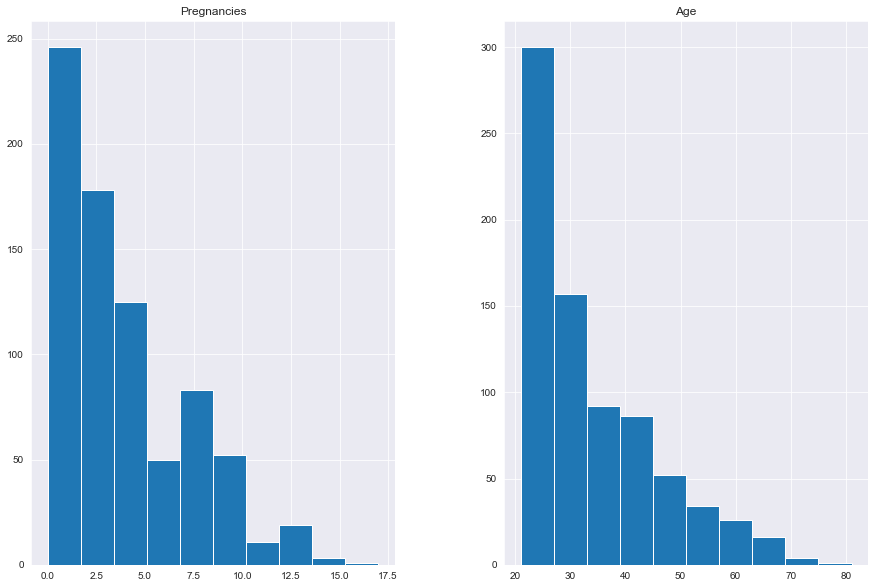

In [7]:
diabetes_df[['Pregnancies', 'Age']].hist(figsize = (15, 10))
plt.show()

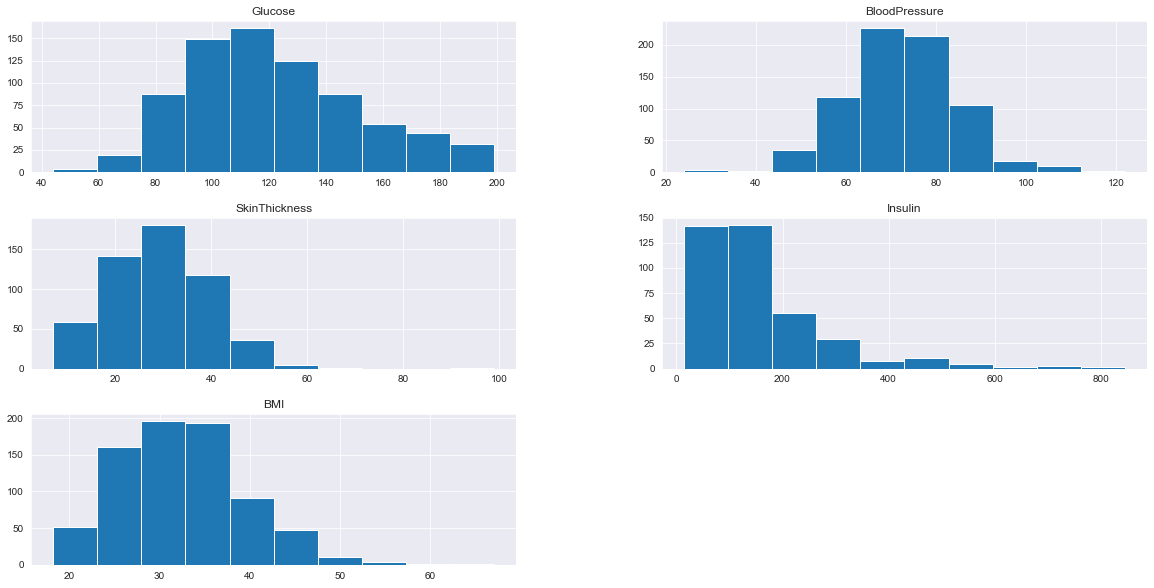

In [8]:
#Before choosing to impute these missing values, let's look at their distributions
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize = (20, 10))
plt.show()
#Since SkinThickness and Insulin look skewed, we can replace their missing values with median instead of mean.
#Glucose and BloodPressure should be okay if we use their means for imputing (Recall mean can be influenced by outliers)

In [9]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

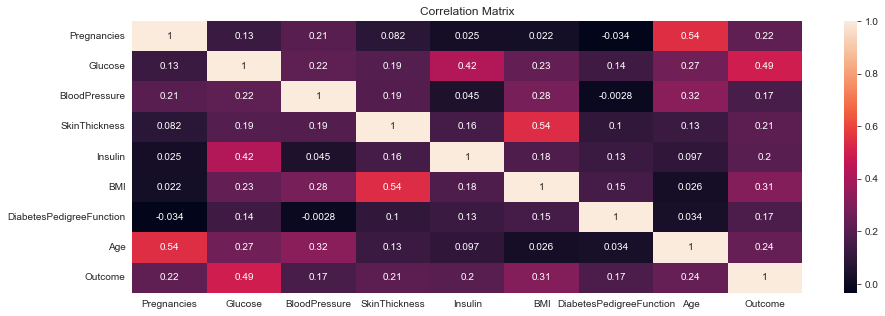

In [10]:
#Let's first create a heatmap to see if there are any correlations in our dataset
sns.heatmap(diabetes_df_copy.corr(), annot = True) #annot = True: writes value in each cell
plt.title('Correlation Matrix')
plt.show()
#Interpretation: No significant case of multi collinearity is observed, no values close to 1

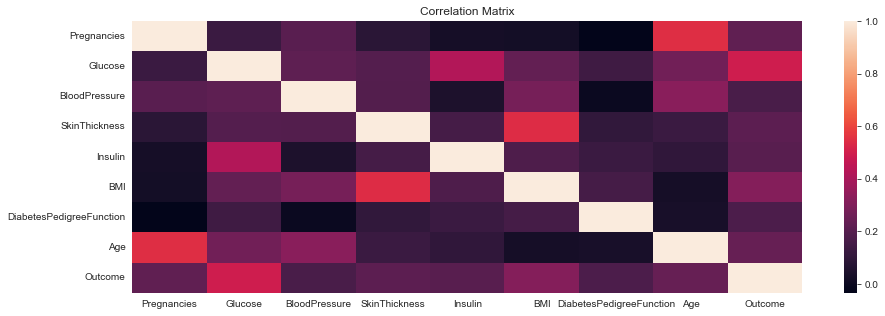

In [11]:
sns.heatmap(diabetes_df_copy.corr(), annot = False) #annot = True - writes value in each cell
plt.title('Correlation Matrix')
plt.show()

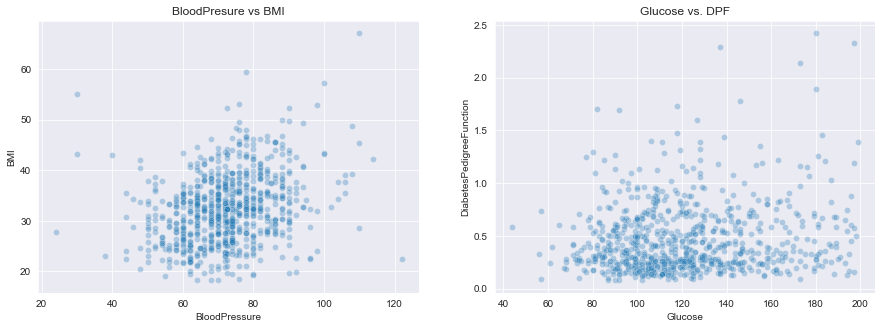

In [12]:
#Let's also check a few scatterplots of our data
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

#alpha parameter adjusts the point transparency. points with much more overlap will appear darker
sns.scatterplot(x = 'BloodPressure', y = 'BMI', data = diabetes_df_copy, alpha = 0.3, ax = axes[0])
axes[0].set_title('BloodPresure vs BMI')

sns.scatterplot(x = 'Glucose', y = 'DiabetesPedigreeFunction', data = diabetes_df_copy, alpha = 0.3, ax = axes[1])
axes[1].set_title('Glucose vs. DPF')

plt.show()
#Interpretation: BMI seems to have a slight increase as blood pressure increases
#Majority of the data seems to be centered and cluster around a blood pressure of 50-95 and BMI of 20-45. We also have some outliers scattered around the main cluster
#There is a very subtle increase in diabetes pedigree function (DPF) as glucose increases
#Majority of the data seems to fall between a 75 and 175 glucose level, we also have some outliers with a very high diabetes pedigree function and again the zeros outliers which were removed in the no_zeros_df

Text(0.5, 1.0, 'SkinThickness vs Age')

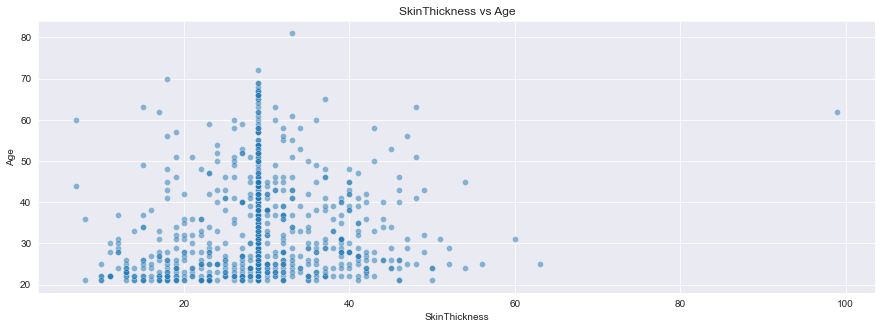

In [48]:
fig = sns.scatterplot(x = 'SkinThickness', y = 'Age', data = diabetes_df_copy, alpha = 0.5)
fig.set_title('SkinThickness vs Age')

/Users/alpha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


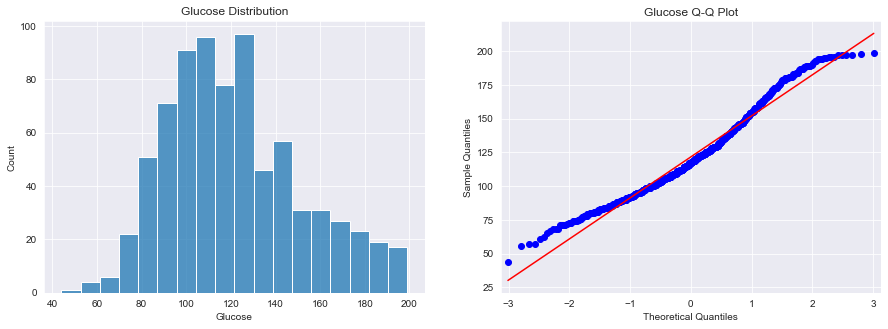

Shapiro-Wilk: 
w:0.969902515411377, p-value:1.7774986343921384e-11
Kolmogorov-Smirnov: 
d:0.969902515411377, p-value:0.0

Skewness of the data: 
0.531677628850459



In [61]:
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.histplot(diabetes_df_copy['Glucose'], ax = axes[0])
axes[0].set_title('Glucose Distribution')

sm.qqplot(diabetes_df_copy['Glucose'], line = 's', ax = axes[1])
axes[1].set_title('Glucose Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['Glucose'])
print('Shapiro-Wilk: \nw:{}, p-value:{}'.format(w, p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['Glucose'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w, p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['Glucose'])))

#The distribution of glucose is unimodel. and appears roughly bell-shaped, but not a near-perfect normal distribution
#The provided Q-Q plot, Shapiro-Wilk, and Kolmogorov-Smirnov tests seem to reject the null hypothesis of the data being a normal distribution at the .05 significance level
#We can also see both by the graph and provided skewness score (Which should be about 0 for normally distributed data) below that the data has a slight right skew
#The distribution peeks around 120 with most of the data between 100 and 140

/Users/alpha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 0.98, 'BloodPressure Q-Q plot')

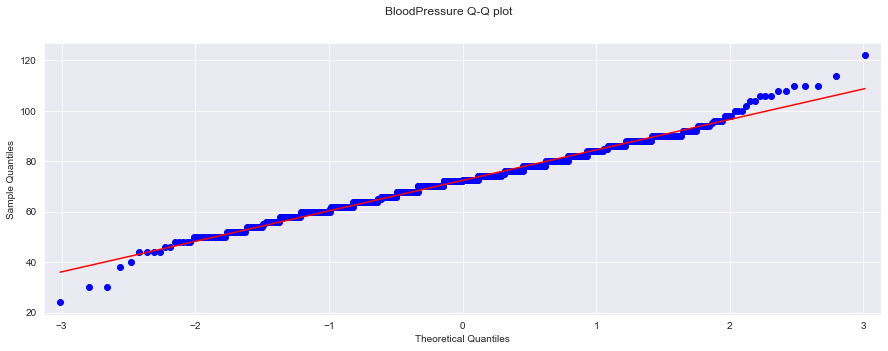

In [62]:
#testing qq plot for bloodpressure
fig3 = sm.qqplot(diabetes_df_copy['BloodPressure'], line = 's')
fig3.suptitle('BloodPressure Q-Q plot')

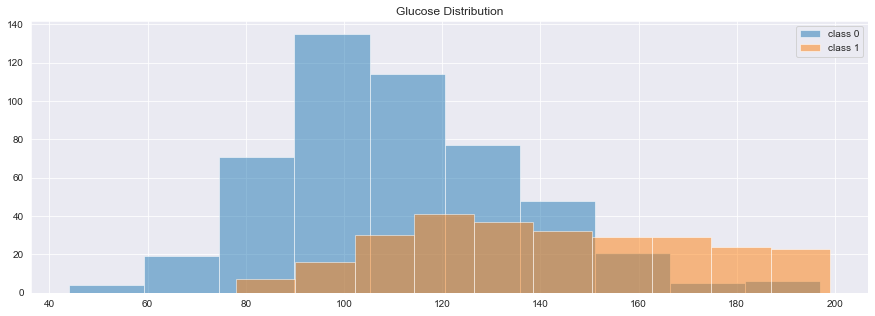

In [14]:
#How does the glucose distribution of people vary from those without?
class_zero = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
class_one = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]

plt.hist(x = class_zero['Glucose'], label = 'class 0', alpha = 0.5)
plt.hist(x = class_one['Glucose'], label = 'class 1', alpha = 0.5)
plt.legend()
plt.title('Glucose Distribution')

plt.show()
#Interpretation: Majority of people in class 0 lie between 93 and 125, where as majority of people in class 1 lie between 119 and 167.
#This attribute could serve as a good indicator to determine whether someone is diabetic or not since those in class 1 tend to be higher end compared to class 0

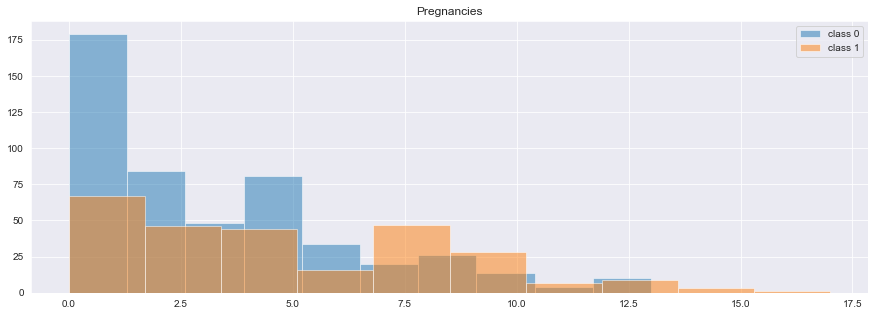

In [15]:
class_zero = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
class_one = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]

plt.hist(x = class_zero['Pregnancies'], label = 'class 0', alpha = 0.5)
plt.hist(x = class_one['Pregnancies'], label = 'class 1', alpha = 0.5)
plt.legend()
plt.title('Pregnancies')

plt.show()
#This kind of shows that those who have less pregnancies (between 0 and 2.5) seem to have a lower chance of getting diabetes

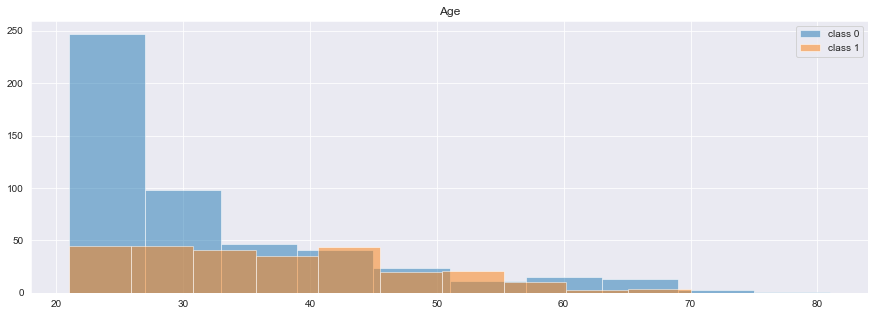

In [16]:
class_zero = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
class_one = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]

plt.hist(x = class_zero['Age'], label = 'class 0', alpha = 0.5)
plt.hist(x = class_one['Age'], label = 'class 1', alpha = 0.5)
plt.legend()
plt.title('Age')

plt.show()
#Age seems like it does not affect diabetes much in those who already have diabetes, on the other hand those who do not have diabetes are majority under 35 years old

In [17]:
#Pre-processing: The most important part is to standardize our data
#The KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, so the scale of the variables matters
#if this is not taken into account, any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classfier, than variables on a small scale
#sklearn can rescale data for us
from sklearn.preprocessing import StandardScaler
#All columns except 'Outcome'
X = diabetes_df_copy.drop('Outcome', axis = 1)
y = diabetes_df_copy['Outcome']

#create our scalar object
scaler = StandardScaler()
#use our scalar object to transfrom/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
#reassign X to a new DataFrame using the X_scaled values
X = pd.DataFrame(data = X_scaled, columns = X.columns)

In [18]:
X.head()
#We can see the the data is now scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


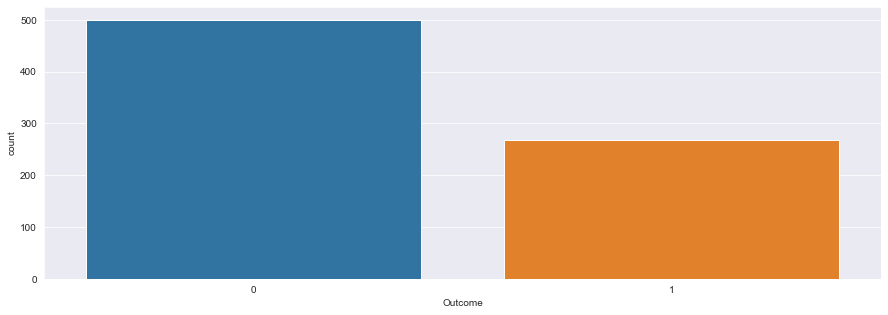

In [19]:
#We are now ready to start creating and training our model. We first need to split data into training and testing sets
#This can be done using train_test_split(X, y, test_size) function
#This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough)
#It will then return a tuple of X_train, X_test, y_train, y_test sets for us
#We will train our model on the training set and then use the test set to evaluate the model
sns.countplot(x = diabetes_df_copy['Outcome'])
plt.show()

In [20]:
#The above graph shows that the data is biased towards datapoints having outcome value 0 (Diabetes not present)
#The number of non-diabetics is almost twice the number of diabetic patients
#This is where an additional parameter stratify can come in handy
#Stratified sampling aims at splitting a dataset so that each split is similar with respect to something
#In a classification setting, it is often chosen to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [21]:
#KNN requires us to find some optimal k value. We will do this by plotting different k values on the x axis, and the model score for that k value on the y-axis
#Can also plot the error on the y-axis, which is quite common as well
from sklearn.neighbors import KNeighborsClassifier
#Will append scores here for plotting later
test_scores = []
train_scores = []

#Testing k values from 1-14
for i in range(1, 15):
    #create a model with k = i
    knn = KNeighborsClassifier(i)
    #train the model
    knn.fit(X_train, y_train)
    
    #append scores
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

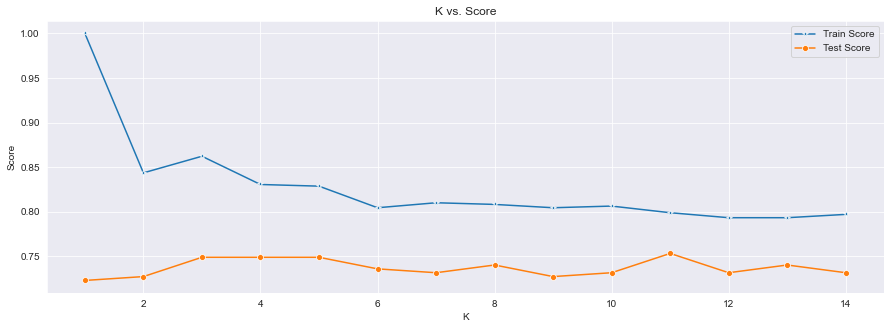

In [25]:
sns.lineplot(x = range(1, 15), y = train_scores, marker = '*', label = 'Train Score')
sns.lineplot(x = range(1, 15), y = test_scores, marker = 'o', label = 'Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()
#The best result seems to be captured at k = 11, so we will use 11 for the final model
#At this value our train and test scores don't vary significantly

In [34]:
knn = KNeighborsClassifier(11)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7532467532467533

In [35]:
#We should also take into account cross validation when considering different models
#Lastly, we can print out a confusion matrix and classification report of our results
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

[[127  23]
 [ 34  47]]
